In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tejeswar001/Heart-ML/main/Data/cvd_preprocessed_data.csv')
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,...,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,BMI_calculated
0,0,-1.241797,-0.818103,-0.387342,-0.609472,-0.430438,0.819469,1.469608,-0.207264,0,...,0,1,-0.389697,-0.264199,-0.072148,-0.208656,1,0.420413,0.346382,-0.605314
1,0,0.690519,1.597125,-0.569215,1.731304,-0.720585,-0.786864,-0.344476,0.604483,1,...,1,2,-0.573158,-0.462690,0.574299,-0.854737,2,-0.673867,1.431275,1.726151
2,1,-0.233632,1.090706,0.431085,0.664951,0.385112,-1.309857,-0.603631,-0.883720,0,...,1,1,0.040886,0.145190,0.620474,0.078490,2,-1.126673,-0.313805,0.668382
3,0,-1.241797,0.662198,0.976704,0.066752,0.863464,-1.085717,0.562566,0.807419,1,...,0,1,0.986260,0.331275,0.805173,0.078490,2,-1.239875,0.325357,0.061701
4,0,0.942560,1.558170,1.067640,0.703964,-0.806845,-0.898934,0.756932,-1.188125,1,...,1,2,1.077990,-1.120193,0.712824,0.580997,3,-1.107806,-0.061505,0.706048


## Data Inspection
Check the structure of the dataset and the distribution of the target variable `CVD Risk Level`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1360 non-null   int64  
 1   Age                           1360 non-null   float64
 2   Weight (kg)                   1360 non-null   float64
 3   Height (m)                    1360 non-null   float64
 4   BMI                           1360 non-null   float64
 5   Abdominal Circumference (cm)  1360 non-null   float64
 6   Total Cholesterol (mg/dL)     1360 non-null   float64
 7   HDL (mg/dL)                   1360 non-null   float64
 8   Fasting Blood Sugar (mg/dL)   1360 non-null   float64
 9   Smoking Status                1360 non-null   int64  
 10  Diabetes Status               1360 non-null   int64  
 11  Physical Activity Level       1360 non-null   int64  
 12  Family History of CVD         1360 non-null   int64  
 13  CVD

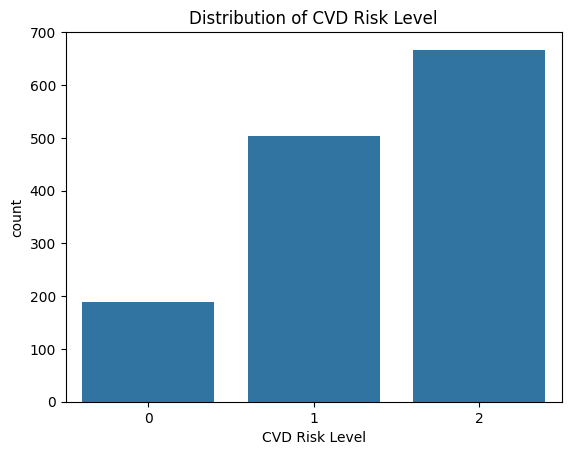

In [3]:
df.info()
print(df['CVD Risk Level'].value_counts())
sns.countplot(x='CVD Risk Level', data=df)
plt.title('Distribution of CVD Risk Level')
plt.show()

## Data Splitting
Split the data into features (X) and target (y), and then into training and testing sets.

In [4]:
X = df.drop(['CVD Risk Level','CVD Risk Score'], axis=1)
y = df['CVD Risk Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (1088, 20)
Testing shape: (272, 20)


## Model Training
We will try multiple algorithms to find the best performing model.
Algorithms to try:
1. Logistic Regression
2. Random Forest
3. Support Vector Machine (SVM)
4. Gradient Boosting
5. K-Nearest Neighbors (KNN)
6. Naive Bayes

In [5]:
# Install necessary libraries
%pip install xgboost catboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:000:00:0100:01


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
import numpy as np

# Calculate scale_pos_weight for XGBoost/LightGBM
# Assuming y_train is available from previous cells
scale_pos_weight = (len(y_train) - y_train.sum()) / y_train.sum()

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(probability=True, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, scale_pos_weight=scale_pos_weight),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42, auto_class_weights='Balanced'),
    "LightGBM": LGBMClassifier(random_state=42, class_weight='balanced')
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    
    results[name] = {
        "Train Accuracy": train_acc, 
        "Test Accuracy": test_acc, 
        "Test F1 Score": test_f1,
        "Test Recall": test_recall
    }
    
    print(f"{name} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, F1: {test_f1:.4f}, Recall: {test_recall:.4f}")
    print("-" * 30)

Training Logistic Regression...
Logistic Regression - Train Acc: 0.6094, Test Acc: 0.5699, F1: 0.5867, Recall: 0.5699
------------------------------
Training Random Forest...
Random Forest - Train Acc: 1.0000, Test Acc: 0.6507, F1: 0.6074, Recall: 0.6507
------------------------------
Training SVM...
SVM - Train Acc: 0.7528, Test Acc: 0.5993, F1: 0.6156, Recall: 0.5993
------------------------------
Training Gradient Boosting...
Gradient Boosting - Train Acc: 0.9292, Test Acc: 0.6471, F1: 0.6256, Recall: 0.6471
------------------------------
Training KNN...
KNN - Train Acc: 0.7178, Test Acc: 0.5625, F1: 0.5468, Recall: 0.5625
------------------------------
Training Naive Bayes...
Naive Bayes - Train Acc: 0.6434, Test Acc: 0.6434, F1: 0.6424, Recall: 0.6434
------------------------------
Training Decision Tree...
Decision Tree - Train Acc: 1.0000, Test Acc: 0.5441, F1: 0.5416, Recall: 0.5441
------------------------------
Training AdaBoost...
AdaBoost - Train Acc: 0.6994, Test Acc: 0.70

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:22:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Train Acc: 1.0000, Test Acc: 0.6507, F1: 0.6371, Recall: 0.6507
------------------------------
Training CatBoost...
CatBoost - Train Acc: 1.0000, Test Acc: 0.6544, F1: 0.6450, Recall: 0.6544
------------------------------
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2444
[LightGBM] [Info] Number of data points in the train set: 1088, number of used features: 20
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LightGBM - Train Acc: 1.0000, Test Acc: 0.6397, F1: 0.6316, Recall: 0.6397
------------------------------


## Model Comparison
Compare the performance of different models.

                     Train Accuracy  Test Accuracy  Test F1 Score  Test Recall
Logistic Regression        0.668199       0.621324       0.589744     0.621324
Random Forest              1.000000       0.625000       0.588761     0.625000
SVM                        0.754596       0.639706       0.591932     0.639706
Gradient Boosting          0.929228       0.647059       0.625648     0.647059
KNN                        0.717831       0.562500       0.546826     0.562500
Naive Bayes                0.643382       0.643382       0.642424     0.643382
Decision Tree              1.000000       0.555147       0.557535     0.555147
AdaBoost                   0.699449       0.702206       0.663019     0.702206
XGBoost                    1.000000       0.650735       0.637097     0.650735
CatBoost                   1.000000       0.687500       0.666194     0.687500
LightGBM                   1.000000       0.625000       0.605615     0.625000


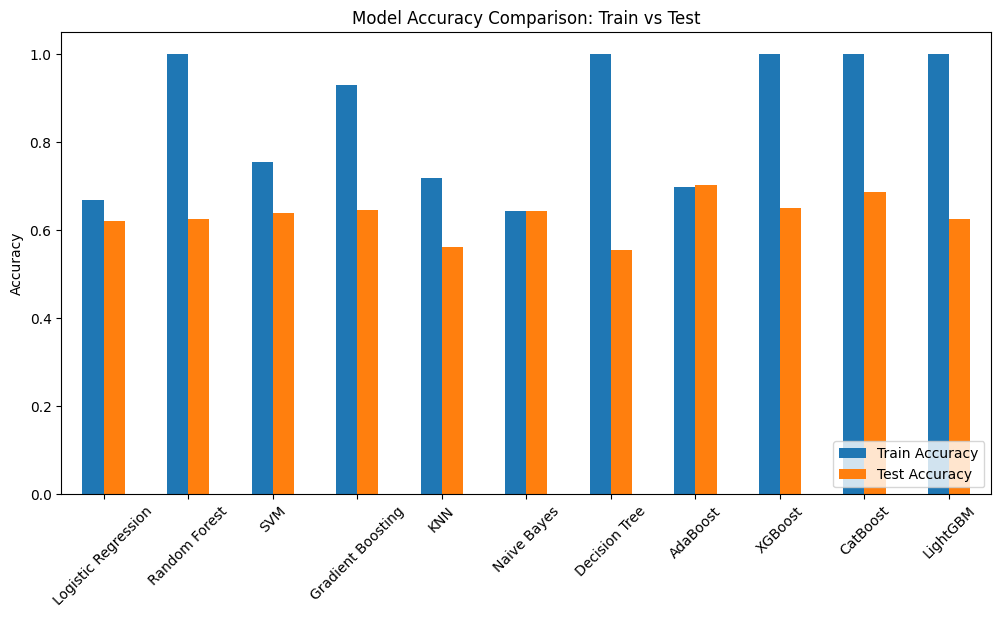

Best Model: AdaBoost


In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

# Plotting Train vs Test Accuracy and Recall
results_df[['Train Accuracy', 'Test Accuracy', 'Test Recall']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

# Select best model based on Recall
best_model_name = results_df['Test Recall'].idxmax()
print(f"Best Model (based on Recall): {best_model_name}")

## Detailed Evaluation of Best Model
Since this is for medical purpose, we need to look at the Confusion Matrix and Classification Report to understand False Negatives and False Positives.

Detailed Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.25      0.05      0.09        38
           1       0.71      0.70      0.71       101
           2       0.72      0.89      0.79       133

    accuracy                           0.70       272
   macro avg       0.56      0.55      0.53       272
weighted avg       0.65      0.70      0.66       272



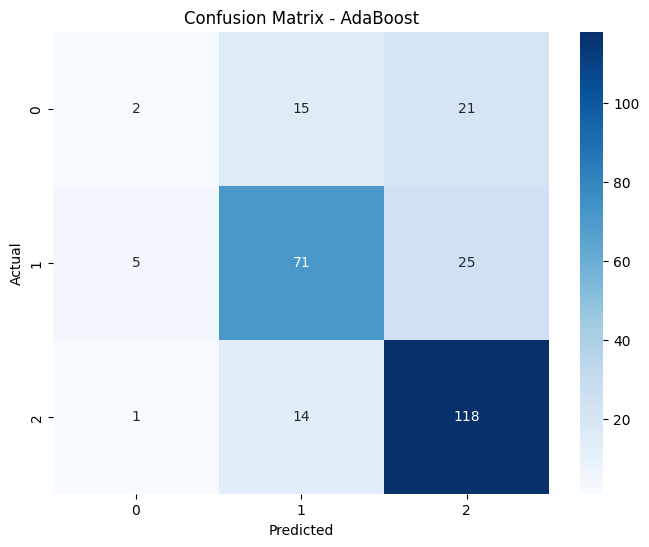

In [11]:
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"Detailed Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get probabilities for the positive class
if hasattr(best_model, "predict_proba"):
    y_scores = best_model.predict_proba(X_test)[:, 1]
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
    
    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recalls, precisions, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    
    # Find optimal threshold for F1 score
    # Note: thresholds array is 1 element shorter than precisions and recalls
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    # Handle division by zero
    f1_scores = np.nan_to_num(f1_scores)
    
    best_threshold_index = np.argmax(f1_scores)
    # Use the threshold corresponding to the best F1 score
    # If index is out of bounds (last element), use the last threshold
    if best_threshold_index < len(thresholds):
        best_threshold = thresholds[best_threshold_index]
    else:
        best_threshold = thresholds[-1]
    
    print(f"Best Threshold for F1: {best_threshold}")
    
    # Apply new threshold
    y_pred_new_threshold = (y_scores >= best_threshold).astype(int)
    
    print("Report with Optimized Threshold:")
    print(classification_report(y_test, y_pred_new_threshold))
    
    # Update best_model predictions if this improves things significantly
    # For now, we just display it.
else:
    print("Selected model does not support probability predictions.")

## Handling Class Imbalance
The target variable `CVD Risk Level` might be imbalanced. We will use SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data.

In [12]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE:")
print(y_train.value_counts())


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())

Before SMOTE:
CVD Risk Level
2    534
1    403
0    151
Name: count, dtype: int64

After SMOTE:
CVD Risk Level
1    534
2    534
0    534
Name: count, dtype: int64


## Retraining Models on Balanced Data
Now we retrain all models using the balanced dataset.

Retraining models on balanced data...
Training Logistic Regression...
Logistic Regression - Train Acc: 0.6404, Test Acc: 0.6029, F1: 0.6096, Recall: 0.6029
------------------------------
Training Random Forest...
Random Forest - Train Acc: 1.0000, Test Acc: 0.6471, F1: 0.6430, Recall: 0.6471
------------------------------
Training SVM...
SVM - Train Acc: 0.8190, Test Acc: 0.5956, F1: 0.6067, Recall: 0.5956
------------------------------
Training Gradient Boosting...
Gradient Boosting - Train Acc: 0.9245, Test Acc: 0.6287, F1: 0.6339, Recall: 0.6287
------------------------------
Training KNN...
KNN - Train Acc: 0.7859, Test Acc: 0.4743, F1: 0.4956, Recall: 0.4743
------------------------------
Training Naive Bayes...
Naive Bayes - Train Acc: 0.6092, Test Acc: 0.6140, F1: 0.6196, Recall: 0.6140
------------------------------
Training Decision Tree...
Decision Tree - Train Acc: 1.0000, Test Acc: 0.5404, F1: 0.5462, Recall: 0.5404
------------------------------
Training AdaBoost...
AdaBoo

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:08:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Train Acc: 1.0000, Test Acc: 0.6360, F1: 0.6382, Recall: 0.6360
------------------------------
Training CatBoost...
CatBoost - Train Acc: 1.0000, Test Acc: 0.6728, F1: 0.6652, Recall: 0.6728
------------------------------
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3553
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 20
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LightGBM - Train Acc: 1.0000, Test Acc: 0.6287, F1: 0.6274, Recall: 0.6287
------------------------------
                     Train Accuracy  Test Accur

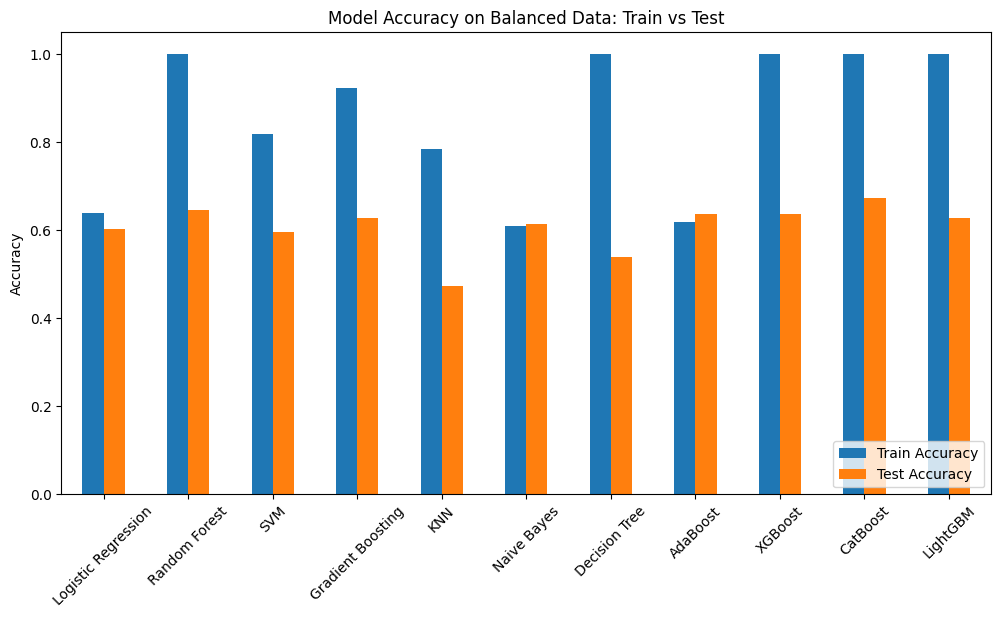

Best Model (Balanced): CatBoost


In [13]:
results_balanced = {}

print("Retraining models on balanced data...")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predictions
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    
    results_balanced[name] = {
        "Train Accuracy": train_acc, 
        "Test Accuracy": test_acc, 
        "Test F1 Score": test_f1,
        "Test Recall": test_recall
    }
    
    print(f"{name} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, F1: {test_f1:.4f}, Recall: {test_recall:.4f}")
    print("-" * 30)

results_balanced_df = pd.DataFrame(results_balanced).T
print(results_balanced_df)

# Plotting Train vs Test Accuracy for Balanced Data
results_balanced_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Accuracy on Balanced Data: Train vs Test')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

best_model_balanced_name = results_balanced_df['Test Accuracy'].idxmax()
print(f"Best Model (Balanced): {best_model_balanced_name}")

## Hyperparameter Tuning (Grid Search CV)
We will perform Grid Search CV to find the best hyperparameters for the best performing model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for a few top models
# Note: scale_pos_weight is defined in previous cells
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'class_weight': ['balanced', 'balanced_subsample']
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6],
        'scale_pos_weight': [scale_pos_weight, scale_pos_weight * 1.5]
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'class_weight': ['balanced']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'class_weight': ['balanced']
    },
    "LightGBM": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'class_weight': ['balanced']
    },
    "CatBoost": {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'auto_class_weights': ['Balanced']
    }
}

if best_model_name in param_grids:
    print(f"Tuning {best_model_name}...")
    grid_search = GridSearchCV(
        estimator=models[best_model_name],
        param_grid=param_grids[best_model_name],
        cv=5,
        scoring='recall', # Optimize for Recall
        n_jobs=-1,
        verbose=2
    )
    
    grid_search.fit(X_train, y_train)
    
    best_tuned_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Recall Score: {grid_search.best_score_}")
    
    best_model_balanced_name = best_model_name # For later use
else:
    print(f"No hyperparameter grid defined for {best_model_name}")
    best_tuned_model = best_model
    best_model_balanced_name = best_model_name

Performing Grid Search for CatBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Parameters: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}


## Final Evaluation of Tuned Model
Evaluate the performance of the tuned model on the test set.

Detailed Report for Tuned CatBoost:
              precision    recall  f1-score   support

           0       0.30      0.29      0.29        38
           1       0.71      0.65      0.68       101
           2       0.73      0.78      0.76       133

    accuracy                           0.67       272
   macro avg       0.58      0.57      0.58       272
weighted avg       0.66      0.67      0.66       272

Accuracy: 0.6654
Recall: 0.6654


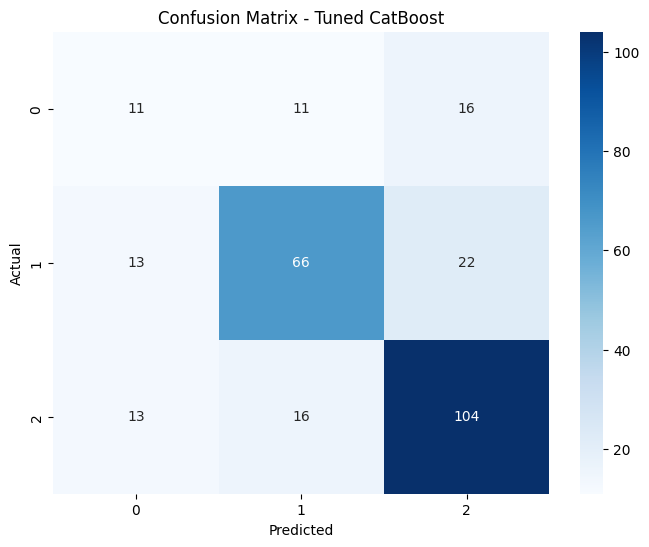

In [16]:
y_pred_tuned = best_tuned_model.predict(X_test)

print(f"Detailed Report for Tuned {best_model_balanced_name}:")
print(classification_report(y_test, y_pred_tuned))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned, average='weighted'):.4f}")

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Tuned {best_model_balanced_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()